In [1]:
from deim_wrapper import Config, list_models, Predictor, visualize_detections, draw_on_image

In [2]:
list_models()

['deim_hgnetv2_n',
 'deim_hgnetv2_s',
 'deim_hgnetv2_m',
 'deim_hgnetv2_l',
 'deim_hgnetv2_x']

In [3]:
config = Config.from_model_name('deim_hgnetv2_s')

In [4]:
config

task: detection
num_workers: 0
batch_size: None
resume: None
tuning: None
epoches: 132
last_epoch: -1
lrsheduler: flatcosine
lr_gamma: 0.5
no_aug_epoch: 12
warmup_iter: 2000
flat_epoch: 64
use_amp: True
use_ema: True
ema_decay: 0.9999
ema_warmups: 2000
sync_bn: True
clip_max_norm: 0.1
find_unused_parameters: False
seed: None
print_freq: 100
checkpoint_freq: 4
output_dir: ./outputs/deim_hgnetv2_s_coco
summary_dir: None
device: 
yaml_cfg: {'task': 'detection', 'evaluator': {'type': 'CocoEvaluator', 'iou_types': ['bbox']}, 'num_classes': 80, 'remap_mscoco_category': True, 'train_dataloader': {'type': 'DataLoader', 'dataset': {'type': 'CocoDetection', 'img_folder': '/datassd/COCO/train2017/', 'ann_file': '/datassd/COCO/annotations/instances_train2017.json', 'return_masks': False, 'transforms': {'type': 'Compose', 'ops': [{'type': 'Mosaic', 'output_size': 320, 'rotation_range': 10, 'translation_range': [0.1, 0.1], 'scaling_range': [0.5, 1.5], 'probability': 1.0, 'fill_value': 0, 'use_cache'

In [5]:
model = Predictor(config, checkpoint_path='deim_dfine_hgnetv2_s_coco_120e.pth')
# model = Predictor("deim_hgnetv2_s")
# model = Predictor(config)

2025-03-09 22:47:07.103 | INFO     | deim_wrapper.predictor:__init__:26 - Initializing Predictor with device=auto
2025-03-09 22:47:07.287 | INFO     | deim_wrapper.predictor:__init__:31 - Auto-selected device: cuda
2025-03-09 22:47:07.289 | DEBUG    | deim_wrapper.predictor:__init__:50 - Successfully initialized distributed environment
2025-03-09 22:47:07.290 | INFO     | deim_wrapper.predictor:__init__:67 - Using provided configuration object
2025-03-09 22:47:07.610 | SUCCESS  | deim_wrapper.predictor:__init__:114 - Predictor initialization complete


In [6]:
image_path = '/home/dnth/Downloads/sample_images/coco/000000000785.jpg'

result = model.predict(image_path, visualize=True, save_path='out.jpg')
result

2025-03-09 22:47:07.616 | DEBUG    | deim_wrapper.predictor:predict:138 - Loading image from path: /home/dnth/Downloads/sample_images/coco/000000000785.jpg
2025-03-09 22:47:07.966 | DEBUG    | deim_wrapper.predictor:predict:172 - Prediction complete. Found 3 objects
2025-03-09 22:47:07.967 | DEBUG    | deim_wrapper.predictor:predict:175 - Generating visualization


{'boxes': array([[279.81665 ,  42.740967, 493.68127 , 390.3882  ],
        [209.37361 , 366.36148 , 612.8235  , 400.9716  ],
        [209.03262 , 369.64557 , 440.538   , 400.89368 ]], dtype=float32),
 'labels': array([ 0, 30, 30]),
 'scores': array([0.9296187 , 0.71767473, 0.28111368], dtype=float32),
 'visualization': <PIL.Image.Image image mode=RGB size=640x425>}

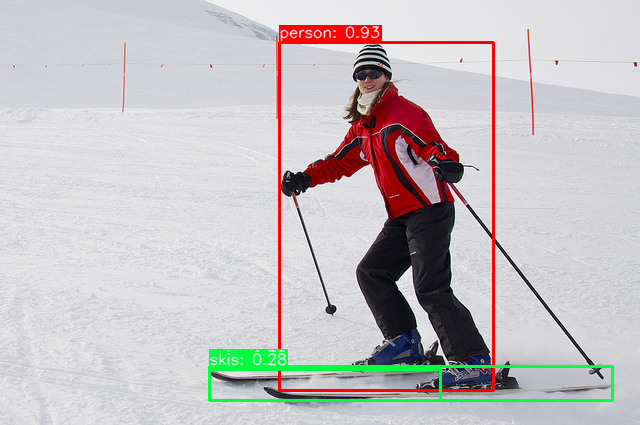

In [7]:
result["visualization"]

In [8]:
result = model.predict_batch([image_path, image_path], visualize=True)
result

2025-03-09 22:47:08.008 | INFO     | deim_wrapper.predictor:predict_batch:213 - Processing batch of 2 images with batch_size=16
2025-03-09 22:47:08.009 | DEBUG    | deim_wrapper.predictor:predict_batch:223 - Loading image 0 from path: /home/dnth/Downloads/sample_images/coco/000000000785.jpg
2025-03-09 22:47:08.019 | DEBUG    | deim_wrapper.predictor:predict_batch:223 - Loading image 1 from path: /home/dnth/Downloads/sample_images/coco/000000000785.jpg
2025-03-09 22:47:08.030 | DEBUG    | deim_wrapper.predictor:predict_batch:239 - Processing batch of 2 images
2025-03-09 22:47:08.099 | DEBUG    | deim_wrapper.predictor:predict_batch:257 - Generating visualization for image 0
2025-03-09 22:47:08.101 | DEBUG    | deim_wrapper.predictor:predict_batch:257 - Generating visualization for image 1
2025-03-09 22:47:08.102 | SUCCESS  | deim_wrapper.predictor:predict_batch:283 - Batch processing complete. Processed 2 images


[{'boxes': array([[279.81104,  42.74173, 493.6853 , 390.38745],
         [209.37433, 366.36877, 612.8225 , 400.97357],
         [209.03166, 369.64417, 440.55496, 400.8952 ]], dtype=float32),
  'labels': array([ 0, 30, 30]),
  'scores': array([0.9295935 , 0.71767354, 0.28117976], dtype=float32),
  'visualization': <PIL.Image.Image image mode=RGB size=640x425>},
 {'boxes': array([[279.81104,  42.74173, 493.6853 , 390.38745],
         [209.37433, 366.36877, 612.8225 , 400.97357],
         [209.03166, 369.64417, 440.55496, 400.8952 ]], dtype=float32),
  'labels': array([ 0, 30, 30]),
  'scores': array([0.9295935 , 0.71767354, 0.28117976], dtype=float32),
  'visualization': <PIL.Image.Image image mode=RGB size=640x425>}]

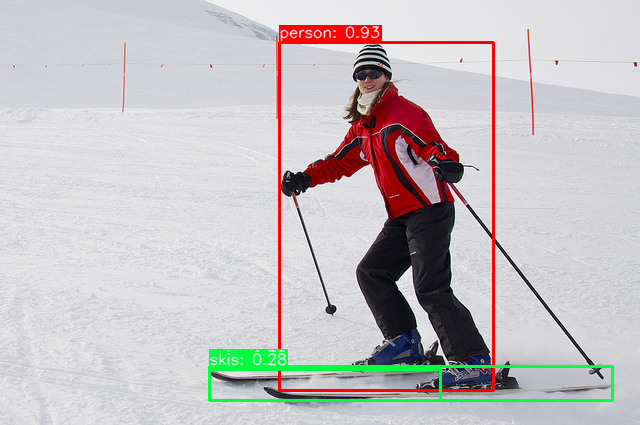

In [10]:
result[0]["visualization"]

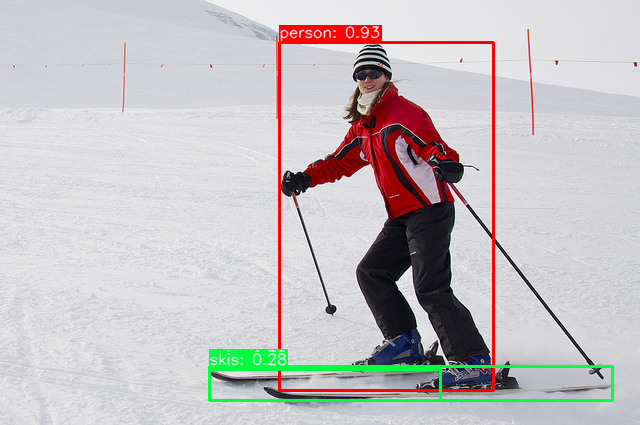

In [11]:
result[1]["visualization"]